# Comparison and Visualization of Cursor vs IMU Data

This code was developed to analyze data and generate figures for "Evaluating Mouse Control and Usability Patterns Across Tremor and Non-Tremor Populations"

### Loading necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

### Alignment of IMU with Cursor Data

(-50.0, 50.0)

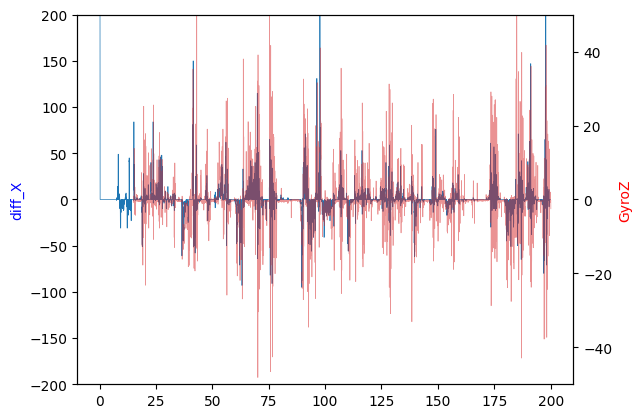

In [ ]:
# Using Participant 1 as the non-tremor example
#------------------------------------------------------#
participant = '44'

# Cursor Data
cursor = pd.read_csv("./data/positions_" + participant + ".txt", sep='\t', header=None, names=['time', 'X', 'Y'])
clicks = cursor[cursor['time'] == 'Mouse Click'].index
clicks = cursor.loc[clicks-1]
cursor.dropna(inplace=True)
cursor['time'] = pd.to_numeric(cursor['time'])

cursor['diff_X'] = cursor['X'].diff()


# IMU Data
IMU = pd.read_csv("./data/TestTaker" + participant + ".csv")
IMU.columns =['time', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
IMU.columns = IMU.columns.str.strip()
IMU['time'] = IMU['time'] + 15  ## the first click (look into this)
IMU['GyroZ'] = IMU['GyroZ'] -2.2



fig, ax1 = plt.subplots()

# Primary y-axis
ax1.plot(cursor['time'], cursor['diff_X'], color='tab:blue', linewidth=0.5)
ax1.set_ylabel('diff_X', color='blue')
ax1.set_ylim([-200, 200])

# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(IMU['time'], IMU['GyroZ'], color='tab:red', linewidth=0.5, alpha=0.5)
ax2.set_ylabel('GyroZ', color='red')
ax2.set_ylim([-50,50])


c:\Users\ahickers\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


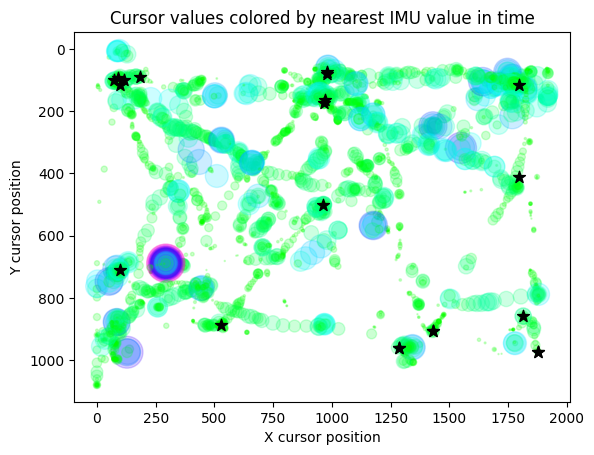

In [ ]:
# Convert to numpy arrays for performance
cursor_times = cursor['time'].to_numpy()
IMU_times = IMU['time'].to_numpy()
IMU_values = IMU['GyroZ'].to_numpy()

# Find insertion indices
indices = np.searchsorted(IMU_times, cursor_times)

# Find closest index
closest_indices = []
for i, t in enumerate(cursor_times):
    idx = indices[i]
    if idx > 0 and (idx == len(IMU_times) or abs(t - IMU_times[idx-1]) <= abs(t - IMU_times[idx])):
        closest_indices.append(idx - 1)
    else:
        closest_indices.append(idx)

# Get matched IMU values
matched_IMU_values = IMU_values[closest_indices]


# Plot

fig, ax = plt.subplots()

plt.scatter(cursor['X'], cursor['Y'], c=matched_IMU_values, alpha=0.2, s=matched_IMU_values*10, cmap='gist_rainbow')

plt.scatter(clicks['X'], clicks['Y'],
            color='k',       # solid fill
            edgecolors='k', # optional border
            s=80,               # marker size
            marker='*',         # filled circle
            zorder=2)          # fully opaqueplt.colorbar(label='GyroZ')
plt.xlabel('X cursor position')
plt.ylabel('Y cursor position')
ax.invert_yaxis()
plt.title('Cursor values colored by nearest IMU value in time')
plt.show()

